In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy.integrate import simps
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import random
random.seed(1200)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DDP/Trelors_data_shear.csv')
shape = df.shape


In [4]:
strains = df.Strain
stresses = df.Stress



In [5]:
energy = []
for i in range(df.shape[0]):
  energy_calc = simps(stresses[0:i+1],x=strains[0:i+1])
  energy.append(energy_calc)
df["Energy"] = energy

In [6]:
print(df)

    Stretch  Strain  Stress    Energy
0      1.00    0.00    0.00  0.000000
1      1.06    0.06    0.07  0.002100
2      1.14    0.14    0.16  0.011336
3      1.21    0.21    0.24  0.025310
4      1.32    0.32    0.33  0.057189
5      1.46    0.46    0.42  0.109649
6      1.87    0.87    0.59  0.321696
7      2.40    1.40    0.76  0.678740
8      2.98    1.98    0.93  1.170974
9      3.48    2.48    1.11  1.677902
10     3.96    2.96    1.28  2.254808
11     4.36    3.36    1.46  2.798034
12     4.69    3.69    1.62  3.310212
13     4.96    3.96    1.79  3.765068


In [7]:
def min_fun(x,a,b,c,d,e,f,g,h):
  ans = []
  for i in range(len(lamda_x)):
    I1 = x[0][i]**2+x[1][i]**2+x[2][i]**2
    I2 = (x[0][i]*x[1][i])**2 + (x[1][i]*x[2][i])**2 + (x[2][i]*x[0][i])**2
    res = a*I1+b*I1**2+c*I1**3+d*I2+e*I2**2+f*I2**3+g*math.log(I1)+h*math.log(I2)
    ans.append(res)
  return ans

In [8]:

def calc_energy_arrudaboyce(l1,l2,l3):
  I1 = l1**2+l2**2+l3**2
  I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  C1 = 1/2 
  C2 = 1/20
  C3 = 11/1050
  C4 = 19/7000
  C5 = 519/673750
  mu = 0.3124
  N = 50.33
  return mu*(C1*(I1-3)+(C2/N)*(I1**2-3**2)+(C3/N**2)*(I1**3-3**3)+(C4/N**3)*(I1**4-3**4)+(C5/N**4)*(I1**5-3**5))



In [9]:
def calc_energy_carroll(l1,l2,l3):
  I1 = l1**2+l2**2+l3**2
  I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  A =  0.1297
  B = 4.91*10**-7
  C = 0.1876
  return (A)*(I1) + (B)*(I1**4) + (C)*(math.sqrt(I2))

In [10]:
def calc_energy_gentthomas(l1,l2,l3):
  I1 = l1**2+l2**2+l3**2
  I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  C1 = 0.1629
  C2 = 0.0376
  return C1*(I1-3)+C2*math.log(I2/3)

In [11]:
lamda_x = df.Stretch.values
total_data_points = lamda_x.shape[0]

lamda_y = [1 for i in range(len(lamda_x))]
lamda_z = [1/i for i in lamda_x]

lamda_y = np.asarray(lamda_y)
lamda_z = np.asarray(lamda_z)

In [12]:
X = (lamda_x,lamda_y,lamda_z)
Y = []
for i in range(total_data_points):
    Y.append(df.Energy[i])

In [13]:
popt_ab, pcov = curve_fit(min_fun,X,Y,bounds=(0,np.inf))

In [14]:
popt_ab

array([7.21975233e-04, 1.79843246e-05, 8.92898209e-20, 6.70527489e-02,
       3.32570644e-03, 8.92897095e-20, 3.84463745e-19, 5.00835012e-19])

In [15]:
y_res = min_fun(X,*popt_ab)

Text(0, 0.5, 'Energy')

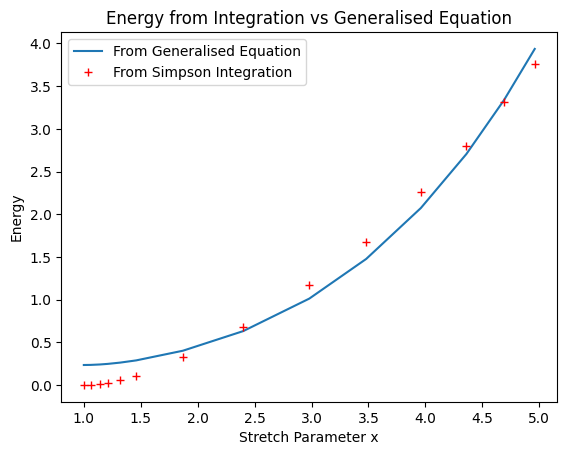

In [16]:
plt.plot(lamda_x,y_res)
plt.plot(lamda_x,energy,'r+')
plt.legend(["From Generalised Equation","From Simpson Integration"])
plt.title("Energy from Integration vs Generalised Equation")
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")

In [17]:
energy_arrudaboyce = []
for i in range(len(lamda_x)):
  energy_arrudaboyce.append(calc_energy_arrudaboyce(lamda_x[i],lamda_y[i],lamda_z[i]))

energy_arrudaboyce = np.asarray(energy_arrudaboyce)

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

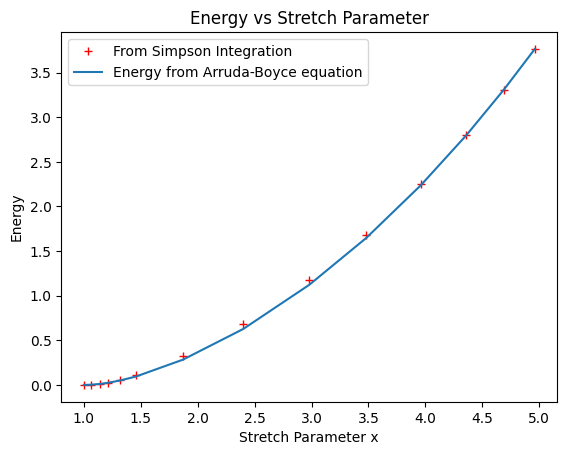

In [18]:
plt.plot(lamda_x,energy,"r+")
plt.plot(lamda_x,energy_arrudaboyce)
plt.legend(["From Simpson Integration","Energy from Arruda-Boyce equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")

In [19]:
energy_carroll = []
for i in range(len(lamda_x)):
  energy_carroll.append(calc_energy_carroll(lamda_x[i],lamda_y[i],lamda_z[i]))

energy_carroll = np.asarray(energy_carroll)

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

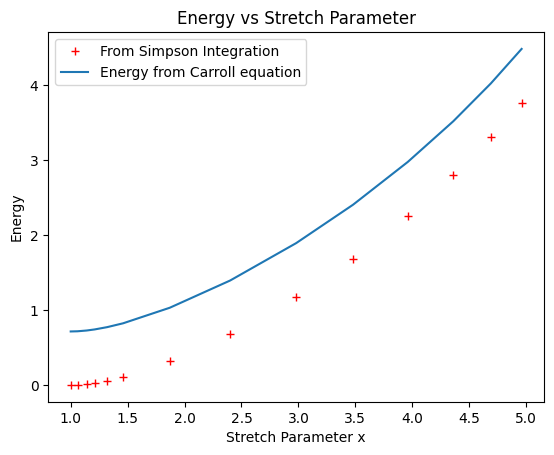

In [20]:
plt.plot(lamda_x,energy,"r+")
plt.plot(lamda_x,energy_carroll)
plt.legend(["From Simpson Integration","Energy from Carroll equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")

In [21]:
energy_gentthomas = []
for i in range(len(lamda_x)):
  energy_gentthomas.append(calc_energy_gentthomas(lamda_x[i],lamda_y[i],lamda_z[i]))
energy_gentthomas = np.asarray(energy_gentthomas)

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

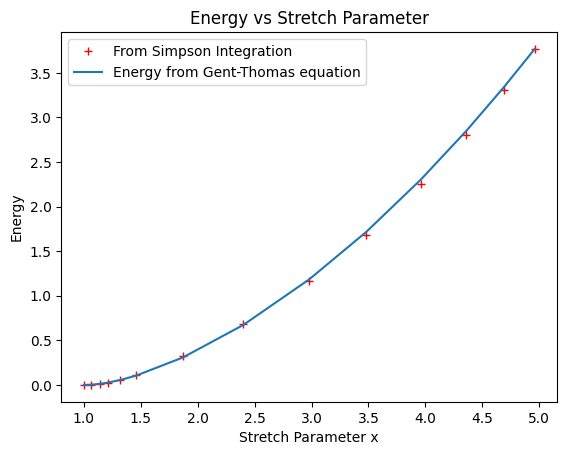

In [22]:
plt.plot(lamda_x,energy,"r+")
plt.plot(lamda_x,energy_gentthomas)
plt.legend(["From Simpson Integration","Energy from Gent-Thomas equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

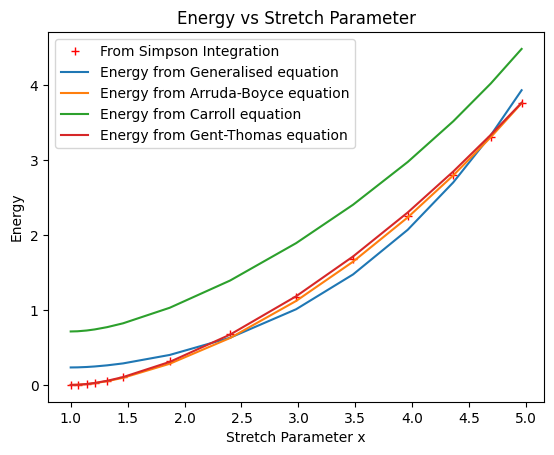

In [23]:
plt.plot(lamda_x,energy,'r+')
plt.plot(lamda_x,y_res)
plt.plot(lamda_x,energy_arrudaboyce)
plt.plot(lamda_x,energy_carroll)
plt.plot(lamda_x,energy_gentthomas)
plt.legend(["From Simpson Integration","Energy from Generalised equation","Energy from Arruda-Boyce equation","Energy from Carroll equation","Energy from Gent-Thomas equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")